<h1> Explorar Datos UANL <h1>

In [ ]:
#Explorar Datos

In [129]:
#Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from scipy.stats import f_oneway, kruskal, normaltest, ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [3]:
# Leer los datos UANL con el URL
url = "https://raw.githubusercontent.com/ppGodel/data_mining/main/csv/typed_uanl.csv"
df = pd.read_csv(url)

In [7]:
# Identificar las entidades:
# Entidades del conjunto de type datos, UANL :
# - Fecha: Fecha del dato
# - Nombre: Nombre del empleado
# - Tipo: Tipo de Empleado
# - Sueldo Neto: Monto del Sueldo del empleado
# - dependencia: Dependencia de la UANL

In [5]:
# Identificar los nombres de las columnas
print("Columnas :\n", df.columns)

Columnas :
 Index(['Nombre', 'Sueldo Neto', 'dependencia', 'Fecha', 'Tipo'], dtype='object')


In [6]:
# Obtener estadísticas descriptivas de cada entidad
EstadisticasDescriptivas = df.describe()
print(f"Estadísticas descriptivas:\n{EstadisticasDescriptivas}\n")

Estadísticas descriptivas:
         Sueldo Neto
count  636201.000000
mean    14241.682401
std      9578.442311
min       175.410000
25%      8007.660000
50%     11426.500000
75%     17654.630000
max    147051.590000



In [ ]:
# Explorando Datos con los que contamos

In [ ]:
#Hallazgos los meses de Junio y diciembres 2021, 2022,2023 se presenta la mayor desviacion estandar
# Junio 2020 se tiene la media mas baja

In [7]:
# Obtengo Medidas descriptivas agrupando por fecha
Agrupado_fecha = df.groupby('Fecha')['Sueldo Neto'].agg(['min', 'max', 'mean', 'std'])
print(Agrupado_fecha)

                min        max          mean           std
Fecha                                                     
2019-12-01   294.44   86245.29  10640.372254   7764.839265
2020-01-01   175.41   97698.38  11344.205985   8844.232417
2020-02-01   350.98   97274.55  11231.748742   8631.169699
2020-03-01   177.20   89433.90  11289.436923   8149.261638
2020-04-01   291.75   98881.96  11735.022899   8773.715312
2020-05-01   359.31   98881.96  11732.281375   8766.129897
2020-06-01   179.65   77608.82  10369.906136   7255.743268
2020-07-01   410.72   98881.96  11757.134112   9029.290937
2020-08-01   407.16   98881.96  11841.815036   9094.887143
2020-09-01   307.14   98881.96  11632.594965   8795.173362
2020-10-01   359.31   98881.96  11708.260166   8679.280885
2020-11-01   343.25   89433.90  11248.326799   8061.233189
2020-12-01  1107.47   93467.50  17127.883190   9414.391177
2021-01-01   547.04  101260.38  12597.308998   9044.763406
2021-02-01   544.11  101463.43  13488.462718   8815.6042

In [54]:
# Sueldo Promedio en los ultimos años de la universidad 2020 en adelante 
Agrupado_fecha_prom = Agrupado_fecha.groupby('Fecha')['mean'].agg(['mean'])
print(Agrupado_fecha_prom)

                    mean
Fecha                   
2019-12-01  10640.372254
2020-01-01  11344.205985
2020-02-01  11231.748742
2020-03-01  11289.436923
2020-04-01  11735.022899
2020-05-01  11732.281375
2020-06-01  10369.906136
2020-07-01  11757.134112
2020-08-01  11841.815036
2020-09-01  11632.594965
2020-10-01  11708.260166
2020-11-01  11248.326799
2020-12-01  17127.883190
2021-01-01  12597.308998
2021-02-01  13488.462718
2021-03-01  13803.605424
2021-04-01  14066.918145
2021-05-01  14021.081356
2021-06-01  17724.347976
2021-07-01  13876.174573
2021-08-01  13646.996018
2021-09-01  13717.606074
2021-10-01  14149.441120
2021-11-01  13046.257272
2022-02-01  13976.290549
2022-03-01  14191.751637
2022-04-01  14799.883008
2022-05-01  14658.988825
2022-06-01  18572.875161
2022-07-01  14656.654943
2022-08-01  14304.841019
2022-09-01  14508.835801
2022-10-01  14691.839746
2022-11-01  13989.882413
2022-12-01  19718.002777
2023-01-01  14737.152639
2023-02-01  14936.212092
2023-03-01  15088.801769


In [ ]:
#Hallazgos no se cuenta con informacion de los meses de Dic 21 y enero 22

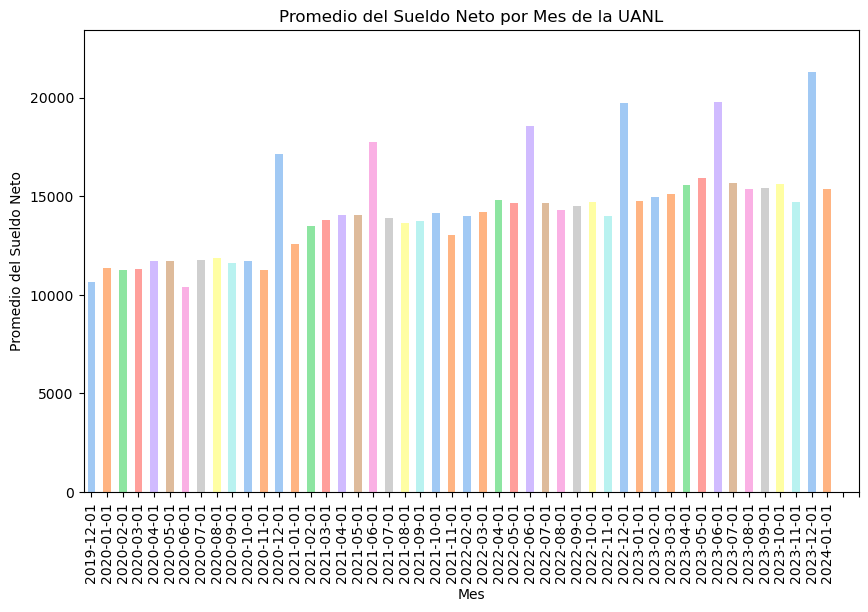

In [56]:
# Definir colores  para las barras
colors = sns.color_palette('pastel', 12)
# Gráfica de barras de la suma del Sueldo Neto por mes
plt.figure(figsize=(10, 6))
Agrupado_fecha_prom['mean'].plot(kind='bar', color=colors)
plt.title(f'Promedio del Sueldo Neto por Mes de la UANL')
plt.xlabel('Mes')
plt.ylabel('Promedio del Sueldo Neto')
plt.xticks(ticks=range(50))#, labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
plt.ylim(0, Agrupado_fecha_prom['mean'].max() * 1.1)  # Ajuste del rango del eje y
plt.show()

In [70]:
# Agrupar por tipo y calcular la media y suma del Sueldo Neto
agrupado_tipo = df.groupby(df['Tipo'])['Nombre'].agg(['count'])
print(agrupado_tipo)

               count
Tipo                
ADMIN          76994
CENTRO         25117
FACULTAD      274527
HOSPITAL      105549
OTRO           12190
PREPARATORIA  141824


C:\Users\PC\AppData\Local\Temp\ipykernel_15192\648097280.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap("Blues")


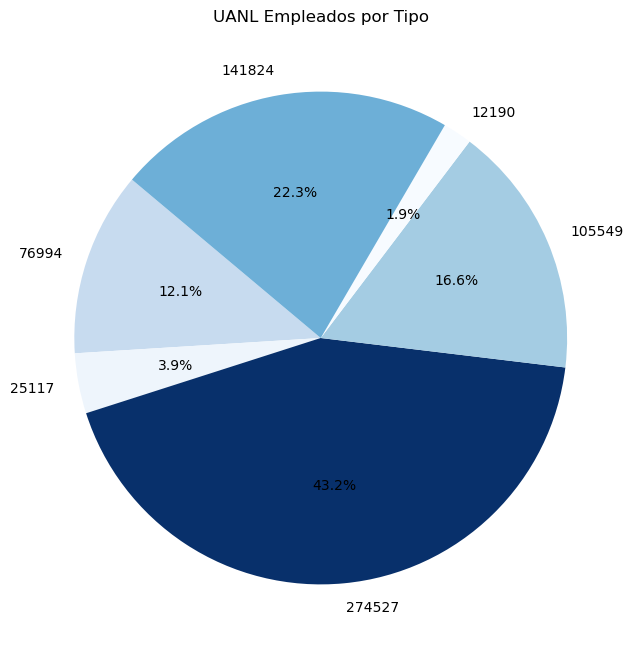

In [90]:
#colores = sns.color_palette('pastel', 12)

# Normalizar los valores
normdata = colors.Normalize(vmin= agrupado_tipo['count'].min(), vmax= agrupado_tipo['count'].max())
colormap = plt.cm.get_cmap("Blues")
#colormap =plt.cm.viridis
colores =colormap(normdata(agrupado_tipo['count']))

# Crear la gráfica de pastel
plt.figure(figsize=(8, 8))  # Tamaño de la figura
plt.pie(agrupado_tipo['count'], labels=agrupado_tipo['count'], autopct='%1.1f%%', startangle=140, colors=colores)

# Añadir título
plt.title('UANL Empleados por Tipo')

# Mostrar la gráfica
plt.show()

C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


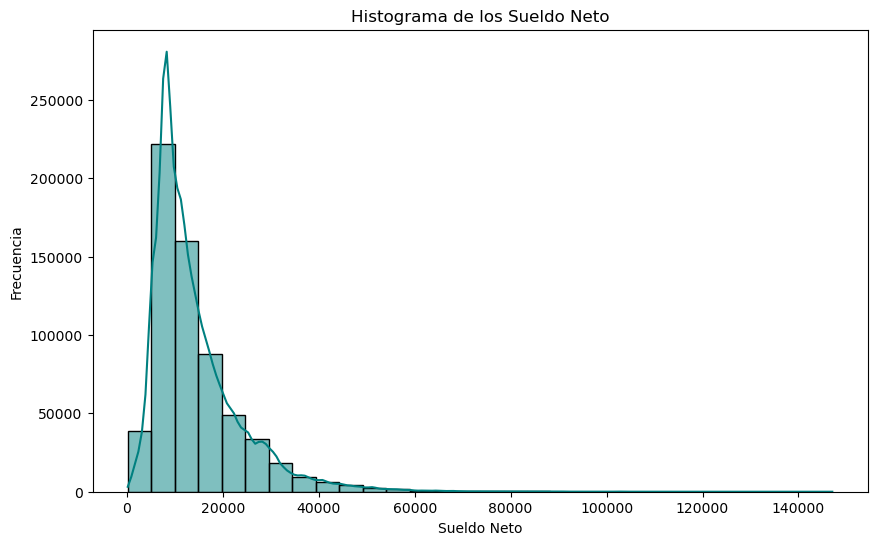

In [114]:
# Histograma de los importes en el año especificado
plt.figure(figsize=(10, 6))
sns.histplot(df['Sueldo Neto'], bins=30,kde=True,  color='teal')
plt.title(f'Histograma de los Sueldo Neto')
plt.xlabel('Sueldo Neto')
plt.ylabel('Frecuencia')
plt.show()


In [122]:
# Para  obtener los datos de cierto año, filtramos y obtenemos medidas descriptivas
# Convertir la columna 'Fecha' a tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])
# Filtrar por año 
year = 2023
df_year = df[df['Fecha'].dt.year == year]

In [40]:
# Hallazgos en la informacion
# No se localiza informacion en el mes de Enero del 2022
# No se localiza informacion en el mes de Diciembre del 2021

In [123]:
# Agrupar por mes y calcular la media y suma del Sueldo Neto
df_sueldodanio = df_year.groupby(df_year['Fecha'].dt.month)['Sueldo Neto'].agg(['min','max','mean', 'sum','std'])
print(df_sueldodanio)

          min        max          mean           sum           std
Fecha                                                             
1      472.57  107790.01  14737.152639  1.695362e+08   9632.615820
2      405.90  106374.47  14936.212092  1.915121e+08   9135.333625
3      405.90  102664.94  15088.801769  1.962299e+08   9044.481396
4      348.02  111936.46  15572.479556  2.046380e+08   9673.707718
5      292.15  111936.46  15938.467928  2.091765e+08   9583.269064
6      722.30  147051.59  19782.699780  2.595490e+08  12778.336497
7      415.39  111936.46  15662.398408  1.789116e+08   9891.055852
8      246.65  111936.46  15351.693323  1.924335e+08   9791.976237
9      405.90  111868.46  15403.922615  2.004512e+08   9594.254425
10     267.00  111868.46  15628.432305  2.045449e+08   9409.956725
11     769.70  102596.94  14693.509905  1.967020e+08   8895.890922
12     230.03  117861.97  21298.893514  2.855969e+08  10357.035251


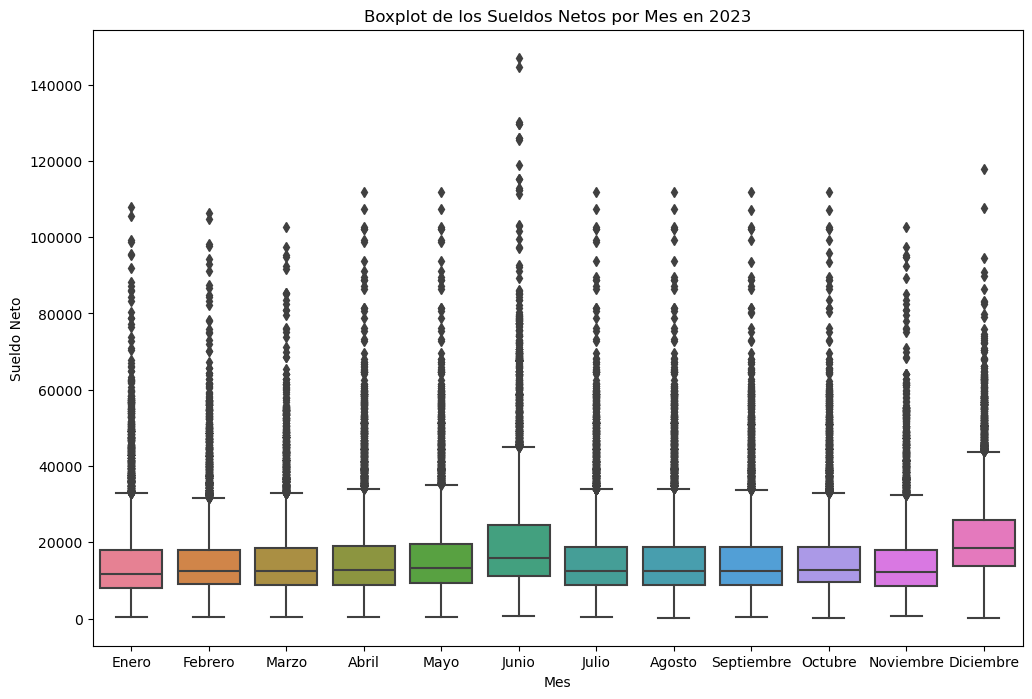

In [126]:
# Boxplot de los saldos neto por mes en el año filtrado
plt.figure(figsize=(12, 8))
sns.boxplot(x=df_year['Fecha'].dt.month, y='Sueldo Neto', data=df_year, palette='husl')
plt.title(f'Boxplot de los Sueldos Netos por Mes en {year}')
plt.xlabel('Mes')
plt.ylabel('Sueldo Neto')
plt.xticks(ticks=range(12), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
plt.show()

In [10]:
# Encontrar trabajadores en distintas dependencias
# Agrupar por nombre (empleado)  y contar los departamentos unicos
empleados_varias_dependencias = df.groupby('Nombre')['dependencia'].nunique()

# Filtrar empleados que trabajan en más de una dependencia
empleados_varias_dependencias = empleados_varias_dependencias[empleados_varias_dependencias > 1]

# Obtener la lista de empleados que trabajan en varias dependencias
empleados_varias_dependencias_lista = empleados_varias_dependencias.index.tolist()
print("Empleados que trabajan en varias dependencias:", empleados_varias_dependencias_lista)


Empleados que trabajan en varias dependencias: ['ABDIAS IVAN ALEMAN FLORES', 'ABEL CASTRO GARCIA', 'ABEL GUZMAN LOPEZ', 'ABISAI EMANUEL GARCIA VALDES', 'ABNER ALEJANDRO MORENO MAYORGA', 'ABRIL CAROLINA ARRIAGA GALLEGOS', 'ADAMARIS CALDERON CORDOVA', 'ADELA VERONICA GONZALEZ PEREZ', 'ADRIAN DE LA GARZA MARTINEZ', 'ADRIANA AGUILA SANCHEZ', 'ADRIANA BRICENO ARREAZOLA', 'ADRIANA CENICEROS PORRAS', 'ADRIANA ELIZABETH RODRIGUEZ ALTHON', 'ADRIANA GUADALUPE GONZALEZ TREVIĂ‘O', 'ADRIANA MARGARITA ASPEITIA OVALLE', 'ADRIANA MIROSLAVA ESCOBEDO DE ANDA', 'ADRIANA RAMIREZ RENDON', 'ADRIANA SANCHEZ GARCIA', 'ADRIANA SEGURA CANTU', 'ALAN RIVERA VILLALOBOS', 'ALBA LUNA GOMEZ', 'ALBERTINA DAVILA PUENTE', 'ALBERTO DOMINGUEZ REYNOSA', 'ALBERTO FABIAN GAYTAN MORIN', 'ALBERTO GERARDO GARCIA ALVAREZ', 'ALBERTO IVAN RAMIREZ SILVA', 'ALBERTO ZAMBRANO ELIZONDO', 'ALDO SAUL GARCIA CUEVAS', 'ALEJANDRA DEL ROCIO MONTOYA ROSALES', 'ALEJANDRA GARCIA OYERVIDES', 'ALEJANDRA GUADALUPE VAZQUEZ DE LA ROSA', 'ALEJANDRA P

In [11]:
# Se unen los datos para presentar la informacion de la depenencias en las cuales estan trabajando
# Hacer un merge (inner join) en la entidd 'nombre' que es la llave 
df_uniondatos = pd.merge(df, empleados_varias_dependencias, on='Nombre', how='inner')

In [14]:
# Muestro los datos que se unieron, para explorar la informacion
df_uniondatos.head(5)

,Nombre,Sueldo Neto,dependencia_x,Fecha,Tipo,dependencia_y
0,BRENDA AZENETH PICAZO GARCIA,8620.34,JUNTA DE GOBIERNO,2019-12-01,ADMIN,2
1,BRENDA AZENETH PICAZO GARCIA,8940.08,JUNTA DE GOBIERNO,2020-01-01,ADMIN,2
2,BRENDA AZENETH PICAZO GARCIA,9078.31,JUNTA DE GOBIERNO,2020-02-01,ADMIN,2
3,BRENDA AZENETH PICAZO GARCIA,9215.39,JUNTA DE GOBIERNO,2020-03-01,ADMIN,2
4,BRENDA AZENETH PICAZO GARCIA,9408.96,JUNTA DE GOBIERNO,2020-04-01,ADMIN,2


In [15]:
# apoyo para conocer las columnas con las que se dio de alta el dataframe
print("Columnas :\n", df_uniondatos.columns)

Columnas :
 Index(['Nombre', 'Sueldo Neto', 'dependencia_x', 'Fecha', 'Tipo',
       'dependencia_y'],
      dtype='object')


In [16]:
# De la union de datos UANL con Empleados en mas de una dependencia, se eligen los entidades a utilizar  
# quitar datos distintos
df_EmpleadosDepedenciaMas = df_uniondatos[['Nombre', 'Tipo', 'dependencia_x', 'dependencia_y']].drop_duplicates()
df_EmpleadosDepedenciaMas.head(100)

,Nombre,Tipo,dependencia_x,dependencia_y
0,BRENDA AZENETH PICAZO GARCIA,ADMIN,JUNTA DE GOBIERNO,2
24,BRENDA AZENETH PICAZO GARCIA,ADMIN,OFICINA DE LA ABOGACÍA GENERAL,2
49,ALBERTINA DAVILA PUENTE,ADMIN,RECTORIA,2
93,ALBERTINA DAVILA PUENTE,ADMIN,DIRECCION TECNICA DE LA RECTORIA,2
97,AURORA MARINA GOMEZ GUZMAN,ADMIN,RECTORIA,2
...,...,...,...,...
1838,SEYMA CAROLINA VILLARREAL GARCIA,ADMIN,DIRECCIÓN DE INNOVACIÓN Y EMPRENDIMIENTO,4
1849,SEYMA CAROLINA VILLARREAL GARCIA,ADMIN,DIRECCIÓN DE EMPRENDIMIENTO Y DESARROLLO EMPRE...,4
1873,VALERIA MICHELLE VAZQUEZ GONZALEZ,CENTRO,SRIA. DE INVESTIGACIÓN CIENTÍFICA Y DESARROLLO...,3
1879,VALERIA MICHELLE VAZQUEZ GONZALEZ,ADMIN,SECRETARÍA DE INNOVACIÓN Y DESARROLLO DIGITAL,3


In [17]:
# Mostrando por tipo de empleado que trabajan en mas de una dependencia
df_EmpleadosDepedenciaMasDep = df_EmpleadosDepedenciaMas.groupby(( 'Nombre')).dependencia_y.max()
df_EmpleadosDepedenciaMasDep = df_EmpleadosDepedenciaMasDep.to_frame()
print(df_EmpleadosDepedenciaMasDep)

                                      dependencia_y
Nombre                                             
ABDIAS IVAN ALEMAN FLORES                         2
ABEL CASTRO GARCIA                                2
ABEL GUZMAN LOPEZ                                 2
ABISAI EMANUEL GARCIA VALDES                      3
ABNER ALEJANDRO MORENO MAYORGA                    2
...                                             ...
YOLANDA GRACIELA GALLEGOS AREVALO                 2
YUDILIA CAROLINA BRIONES COVARRUBIAS              3
YULISAN FERNANDEZ SILVA                           2
YURIDIANA LIZBETH POSADAS GALINDO                 2
ZAIRA LUCIA GONZALEZ CONTRERAS                    2

[1192 rows x 1 columns]


In [18]:
# Mostrando por dependencia la maxima cantidad  en la que los empleados trabajan 
agrupado_empleadosnombremasdep = df_EmpleadosDepedenciaMas.groupby(df_EmpleadosDepedenciaMas['dependencia_x'])['dependencia_y'].agg([ 'max'])
print(agrupado_empleadosnombremasdep)

                                                    max
dependencia_x                                          
AUDITORIA INTERNA DE LA U.A.N.L.                      4
C. INNOVACION; INVEST. Y DESLLO. DE INGENIERIA ...    2
C.DE ESTUDIOS HUMANISTICOS                            2
C.DE INV.Y DES.DE ED.BILINGUE                         2
CAPILLA ALFONSINA BIBLIOTECA UNIVERSITARIA            3
...                                                 ...
SRIA. DE INVESTIGACIÓN CIENTÍFICA Y DESARROLLO ...    5
TESORERIA GENERAL                                     5
UNIDAD DE TRANSPARENCIA                               4
WORLD TRADE CENTER MONTEREY-UANL                      5
´CAPILLA ALFONSINA´ BIBLIOTECA UNIVERSITARIA          3

[145 rows x 1 columns]


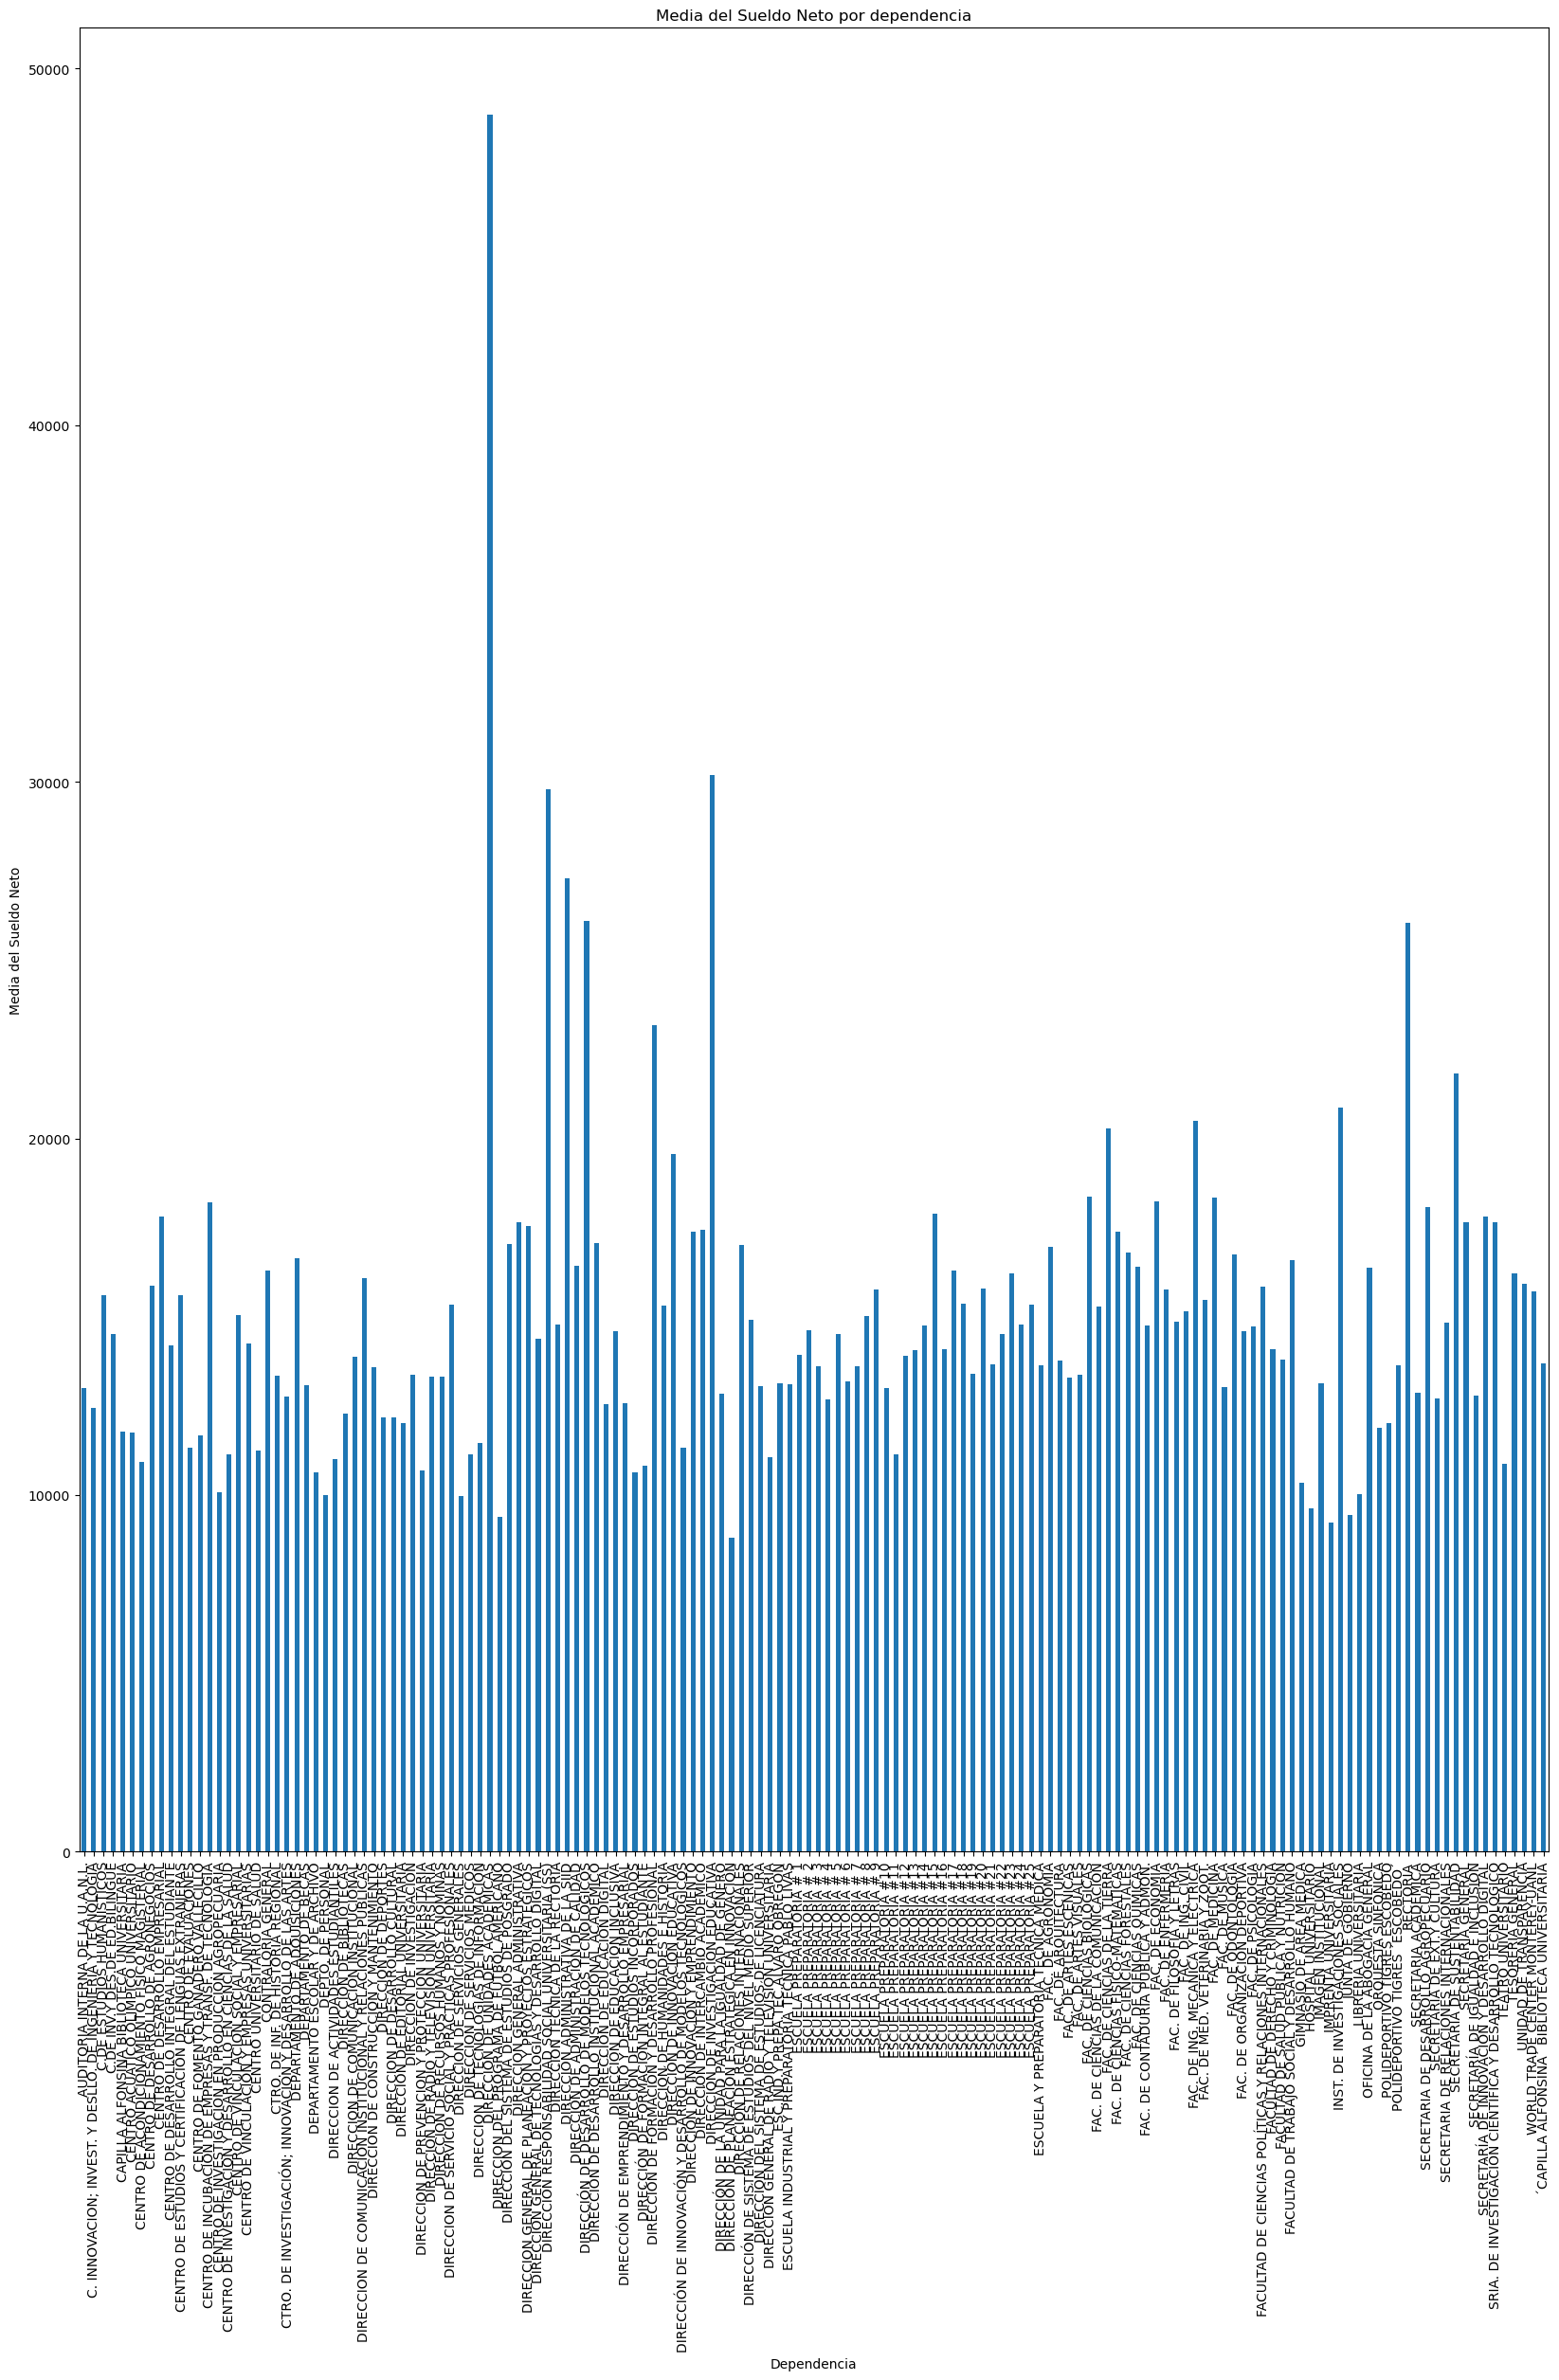

In [21]:
# Visualización de los resultados

# Gráfica de barras de la media del Sueldo Neto por mes
plt.figure(figsize=(20, 25))
agrupado_dependencia['mean'].plot(kind='bar')
plt.title(f'Media del Sueldo Neto por dependencia')
plt.xlabel('Dependencia')
plt.ylabel('Media del Sueldo Neto')
plt.xticks(ticks=range(152))
plt.show()

In [177]:
# Hallazgos al graficar por dependencia encontre un pico en la grafica
# se idetifica que es el dependencia de Dir de unidades academicas,  por lo que se filtra la informacion para ver el detalle
df_mayormediadep = df[df['dependencia'].str.contains('DIRECCION DE UNIDADES ACADEMICAS', case=False, na=False)]
print(df_mayormediadep)

                                Nombre  Sueldo Neto  \
624134  JOSE LEANDRO TRISTAN RODRIGUEZ     43254.72   
635937  JOSE LEANDRO TRISTAN RODRIGUEZ     54159.08   

                             dependencia      Fecha   Tipo  
624134  DIRECCION DE UNIDADES ACADEMICAS 2023-12-01  ADMIN  
635937  DIRECCION DE UNIDADES ACADEMICAS 2024-01-01  ADMIN  


In [200]:
df_filtromayormediadep = df[df['Nombre'].str.contains('JOSE LEANDRO TRISTAN RODRIGUEZ', case=False, na=False)]
df_filtromayormediadep.head(50)

,Nombre,Sueldo Neto,dependencia,Fecha,Tipo
7374,JOSE LEANDRO TRISTAN RODRIGUEZ,38743.71,FAC. DE ORGANIZACION DEPORTIVA,2019-12-01,FACULTAD
20434,JOSE LEANDRO TRISTAN RODRIGUEZ,42625.31,FAC. DE ORGANIZACION DEPORTIVA,2020-01-01,FACULTAD
34134,JOSE LEANDRO TRISTAN RODRIGUEZ,42464.82,FAC. DE ORGANIZACION DEPORTIVA,2020-02-01,FACULTAD
48274,JOSE LEANDRO TRISTAN RODRIGUEZ,41656.88,FAC. DE ORGANIZACION DEPORTIVA,2020-03-01,FACULTAD
62526,JOSE LEANDRO TRISTAN RODRIGUEZ,43624.11,FAC. DE ORGANIZACION DEPORTIVA,2020-04-01,FACULTAD
76787,JOSE LEANDRO TRISTAN RODRIGUEZ,43624.11,FAC. DE ORGANIZACION DEPORTIVA,2020-05-01,FACULTAD
90999,JOSE LEANDRO TRISTAN RODRIGUEZ,38766.15,FAC. DE ORGANIZACION DEPORTIVA,2020-06-01,FACULTAD
103872,JOSE LEANDRO TRISTAN RODRIGUEZ,43624.11,FAC. DE ORGANIZACION DEPORTIVA,2020-07-01,FACULTAD
116255,JOSE LEANDRO TRISTAN RODRIGUEZ,43624.10,FAC. DE ORGANIZACION DEPORTIVA,2020-08-01,FACULTAD
129869,JOSE LEANDRO TRISTAN RODRIGUEZ,43624.10,FAC. DE ORGANIZACION DEPORTIVA,2020-09-01,FACULTAD


In [212]:
#  Hallazgo JOSE LEANDRO TRISTAN RODRIGUEZ esta en dos dependencias a partir del 2024  FACULTAD  / ADMIN
# Convertir la columna 'Fecha' a tipo datetime
df_filtromayormediadep['Fecha'] = pd.to_datetime(df_filtromayormediadep['Fecha'])

# Filtrar por año, por ejemplo, 2020
anio = 2024
df_anio = df_filtromayormediadep[df_filtromayormediadep['Fecha'].dt.year == anio]

# Agrupar por mes y calcular la media y suma del Sueldo Neto
mes_df_filtromayormediadep = df_anio.groupby(df_anio['Fecha'].dt.month)['Sueldo Neto'].agg(['mean', 'sum'])
print(mes_df_filtromayormediadep)


           mean        sum
Fecha                     
1      54159.08  108318.16


C:\Users\PC\AppData\Local\Temp\ipykernel_9992\3526610230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtromayormediadep['Fecha'] = pd.to_datetime(df_filtromayormediadep['Fecha'])


In [22]:
#  Obtener los sueldos netos por fecha , empleado
#   Sumar sueldos por fecha y empleado
suma_sueldo = df.groupby(['Fecha', 'Nombre'])['Sueldo Neto'].sum().reset_index()
print("Suma de sueldos por fecha y empleado:")
print(suma_sueldo)

Suma de sueldos por fecha y empleado:
            Fecha                               Nombre  Sueldo Neto
0      2019-12-01        AARON ABDIEL TREJO VILLALOBOS      3518.39
1      2019-12-01                    AARON CRUZ VARGAS      4835.71
2      2019-12-01        AARON EDGARDO ESPINOZA GARCIA       714.28
3      2019-12-01          AARON GERALDO SOTO ESPINOZA      5561.06
4      2019-12-01   AARON GILBERTO VILLARREAL ELIZONDO     36523.66
...           ...                                  ...          ...
632473 2024-01-01              ZULLY BAZALDUA GUERRERO      9211.97
632474 2024-01-01                  ZULMA ESPINOZA MATA      5342.94
632475 2024-01-01        ZULY MARLENE COVARRUBIAS MATA      7554.58
632476 2024-01-01          ZURYA VANESSA LLAMAS MEDINA     11928.65
632477 2024-01-01  ZUZANKA ALEJANDRA VILLARREAL ARIZPE     23273.49

[632478 rows x 3 columns]


In [91]:
# Encontrar el sueldo neto maximo por fecha
max_sueldo = suma_sueldo.loc[suma_sueldo.groupby('Fecha')['Sueldo Neto'].idxmax()].reset_index(drop=True)
# Agrupar por fecha y nombre,  sueldo neto maximo 
print(max_sueldo )

        Fecha                             Nombre  Sueldo Neto
0  2019-12-01              REYES S. TAMEZ GUERRA     86245.29
1  2020-01-01              REYES S. TAMEZ GUERRA     97698.38
2  2020-02-01              REYES S. TAMEZ GUERRA     97274.55
3  2020-03-01              REYES S. TAMEZ GUERRA     89433.90
4  2020-04-01              REYES S. TAMEZ GUERRA     98881.96
5  2020-05-01              REYES S. TAMEZ GUERRA     98881.96
6  2020-06-01              REYES S. TAMEZ GUERRA     77608.82
7  2020-07-01              REYES S. TAMEZ GUERRA     98881.96
8  2020-08-01              REYES S. TAMEZ GUERRA     98881.96
9  2020-09-01              REYES S. TAMEZ GUERRA     98881.96
10 2020-10-01              REYES S. TAMEZ GUERRA     98881.96
11 2020-11-01              REYES S. TAMEZ GUERRA     89433.90
12 2020-12-01              JESUS ANCER RODRIGUEZ     93467.50
13 2021-01-01              REYES S. TAMEZ GUERRA    101260.38
14 2021-02-01              REYES S. TAMEZ GUERRA    101463.43
15 2021-

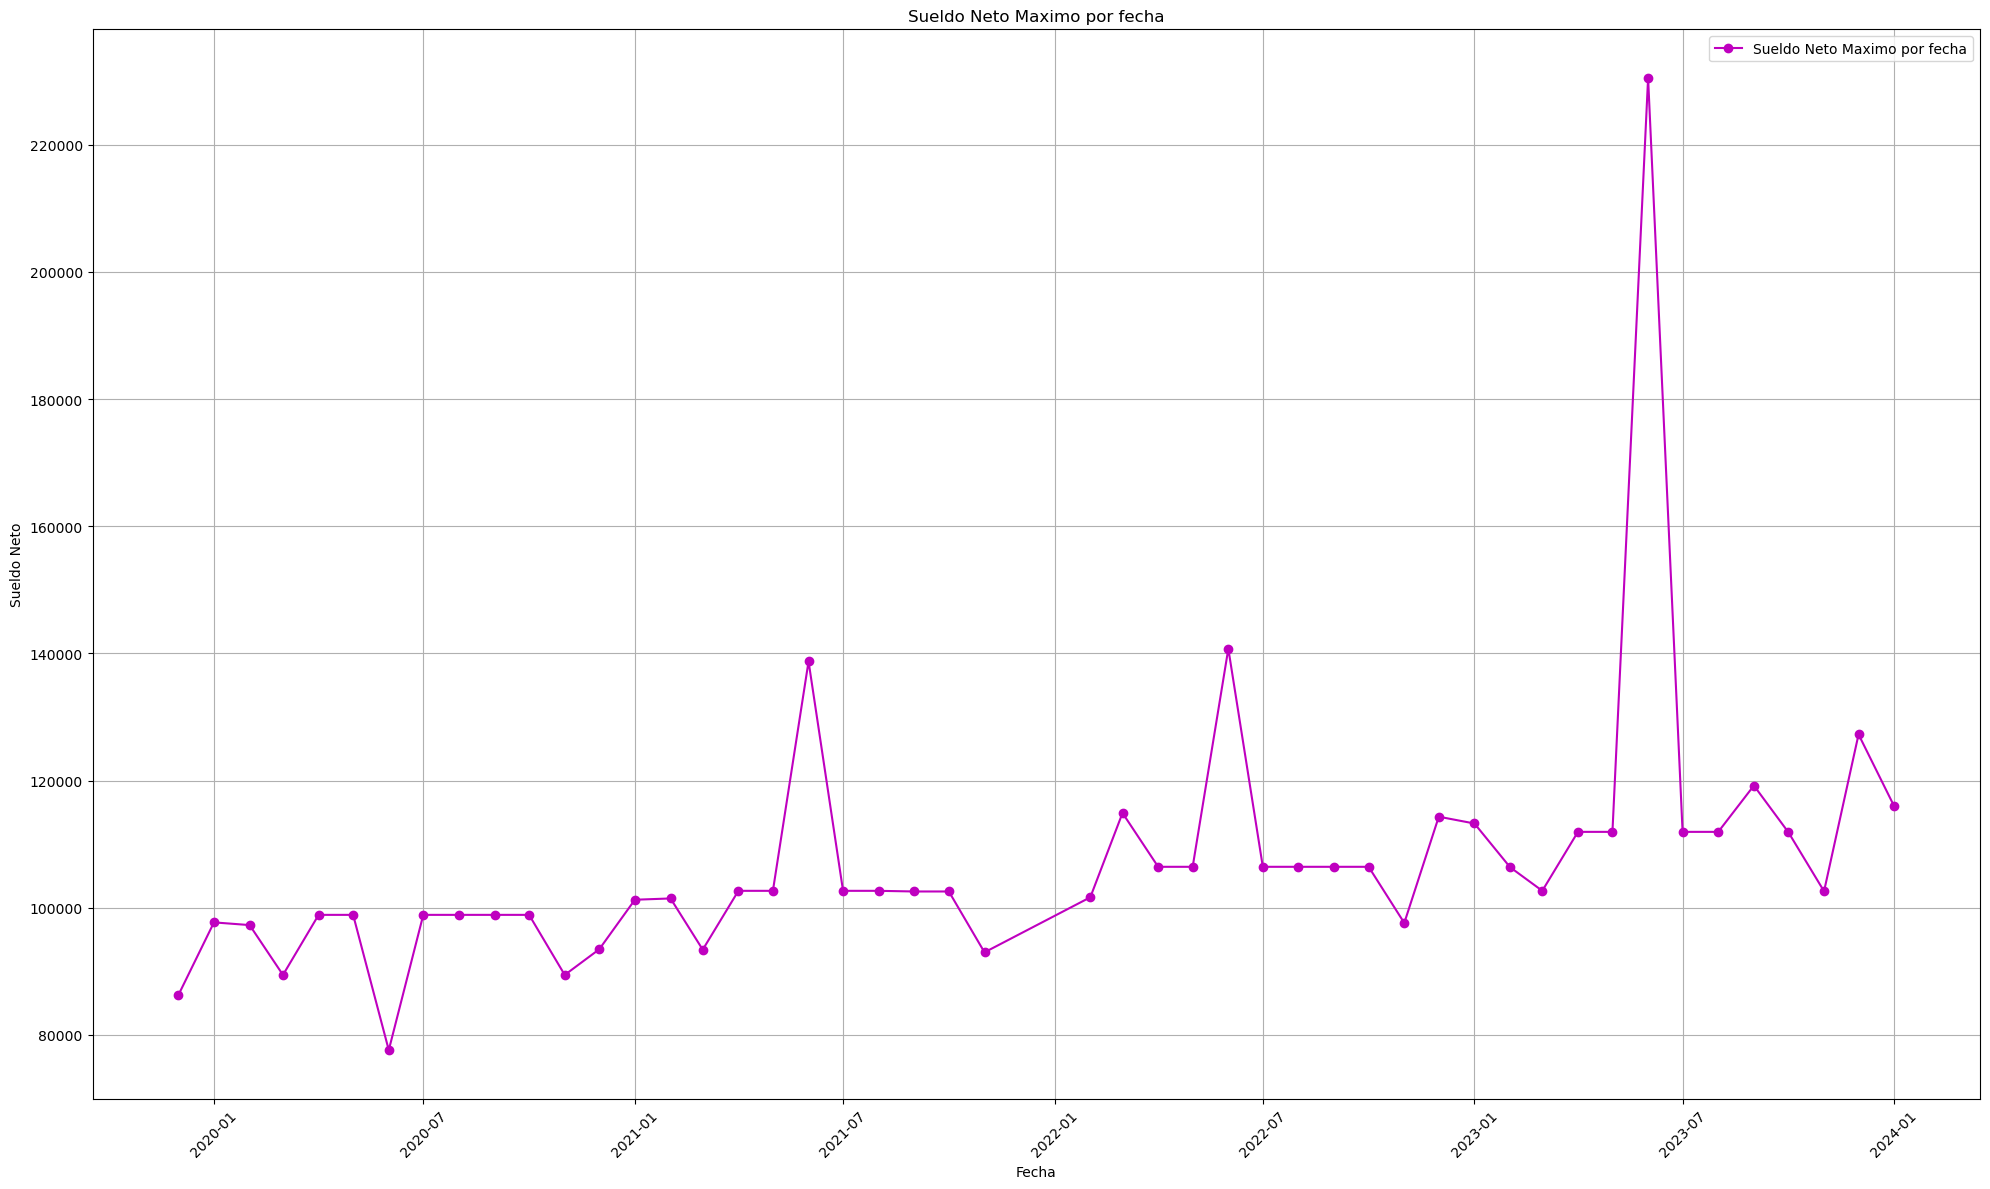

In [101]:
# Graficar los fechas con los sueltos netos maximos
plt.figure(figsize=(20, 12))
plt.plot(max_sueldo['Fecha'], max_sueldo['Sueldo Neto'], marker='o', linestyle='-', color='m', label='Sueldo Neto Maximo por fecha')

plt.xlabel('Fecha')
plt.ylabel('Sueldo Neto')
plt.title('Sueldo Neto Maximo por fecha')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#   Hallazgos empleado con un saldo elevada de la media, en el mes de Junio
#  Admin Rectoria y preparatoria 12  en el mes de Junio 2023, con un sueldo de 115,000 en cada dependencia
#  Junio 2021, 2022,  se tienen una media elevada,  vemos que el sueldo del rector esos meses esta arriba de la media
# Junio 2020  se cuenta con la media de sueldo mas baja, el sueldo maxmo no estan elevado como en otros meses

In [39]:
suma_sueldonombre = max_sueldo.groupby(['Fecha', 'Nombre'])['Sueldo Neto'].sum().reset_index()
print("Suma de sueldos por fecha y empleado:")
print(suma_sueldo)


Suma de sueldos por fecha y empleado:
            Fecha                               Nombre  Sueldo Neto
0      2019-12-01        AARON ABDIEL TREJO VILLALOBOS      3518.39
1      2019-12-01                    AARON CRUZ VARGAS      4835.71
2      2019-12-01        AARON EDGARDO ESPINOZA GARCIA       714.28
3      2019-12-01          AARON GERALDO SOTO ESPINOZA      5561.06
4      2019-12-01   AARON GILBERTO VILLARREAL ELIZONDO     36523.66
...           ...                                  ...          ...
632473 2024-01-01              ZULLY BAZALDUA GUERRERO      9211.97
632474 2024-01-01                  ZULMA ESPINOZA MATA      5342.94
632475 2024-01-01        ZULY MARLENE COVARRUBIAS MATA      7554.58
632476 2024-01-01          ZURYA VANESSA LLAMAS MEDINA     11928.65
632477 2024-01-01  ZUZANKA ALEJANDRA VILLARREAL ARIZPE     23273.49

[632478 rows x 3 columns]


In [45]:
suma_sueldomaxnombre = suma_sueldonombre.groupby(['Fecha', 'Nombre'])['Sueldo Neto'].max().reset_index()
print("Suma de sueldos por fecha y empleado:")
print(suma_sueldomaxnombre)

Suma de sueldos por fecha y empleado:
        Fecha                             Nombre  Sueldo Neto
0  2019-12-01              REYES S. TAMEZ GUERRA     86245.29
1  2020-01-01              REYES S. TAMEZ GUERRA     97698.38
2  2020-02-01              REYES S. TAMEZ GUERRA     97274.55
3  2020-03-01              REYES S. TAMEZ GUERRA     89433.90
4  2020-04-01              REYES S. TAMEZ GUERRA     98881.96
5  2020-05-01              REYES S. TAMEZ GUERRA     98881.96
6  2020-06-01              REYES S. TAMEZ GUERRA     77608.82
7  2020-07-01              REYES S. TAMEZ GUERRA     98881.96
8  2020-08-01              REYES S. TAMEZ GUERRA     98881.96
9  2020-09-01              REYES S. TAMEZ GUERRA     98881.96
10 2020-10-01              REYES S. TAMEZ GUERRA     98881.96
11 2020-11-01              REYES S. TAMEZ GUERRA     89433.90
12 2020-12-01              JESUS ANCER RODRIGUEZ     93467.50
13 2021-01-01              REYES S. TAMEZ GUERRA    101260.38
14 2021-02-01              REYES

In [46]:
df_filtromayorsueldo = df[df['Nombre'].str.contains('VICTOR EDUARDO SANCHEZ PLASCENCIA', case=False, na=False)]
df_filtromayorsueldo.head(50)

,Nombre,Sueldo Neto,dependencia,Fecha,Tipo
20,VICTOR EDUARDO SANCHEZ PLASCENCIA,72171.38,RECTORIA,2019-12-01,ADMIN
14430,VICTOR EDUARDO SANCHEZ PLASCENCIA,79086.70,RECTORIA,2020-01-01,ADMIN
27131,VICTOR EDUARDO SANCHEZ PLASCENCIA,79141.75,RECTORIA,2020-02-01,ADMIN
40996,VICTOR EDUARDO SANCHEZ PLASCENCIA,74360.51,RECTORIA,2020-03-01,ADMIN
55206,VICTOR EDUARDO SANCHEZ PLASCENCIA,79998.30,RECTORIA,2020-04-01,ADMIN
69515,VICTOR EDUARDO SANCHEZ PLASCENCIA,79998.30,RECTORIA,2020-05-01,ADMIN
83685,VICTOR EDUARDO SANCHEZ PLASCENCIA,67107.77,RECTORIA,2020-06-01,ADMIN
97938,VICTOR EDUARDO SANCHEZ PLASCENCIA,79998.30,RECTORIA,2020-07-01,ADMIN
110486,VICTOR EDUARDO SANCHEZ PLASCENCIA,79998.29,RECTORIA,2020-08-01,ADMIN
122779,VICTOR EDUARDO SANCHEZ PLASCENCIA,79998.29,RECTORIA,2020-09-01,ADMIN


In [133]:
# ANOVA o Prueba no paramétrica
# Comprobando la normalidad de los Saldos Netos por tipo de empleado
normality_tests = df.groupby('Tipo')['Sueldo Neto'].apply(lambda x: normaltest(x).pvalue)
print("Normality test p-values:\n", normality_tests)

Normality test p-values:
 Tipo
ADMIN           0.0
CENTRO          0.0
FACULTAD        0.0
HOSPITAL        0.0
OTRO            0.0
PREPARATORIA    0.0
Name: Sueldo Neto, dtype: float64


In [134]:
# ANOVA o Prueba no paramétrica
# Comprobando la normalidad de los Saldos Netos por tipo de gasto
normality_tests = df.groupby('Tipo')['Sueldo Neto'].apply(lambda x: normaltest(x).pvalue)
print("Normality test p-values:\n", normality_tests)

# Si todas las muestras son normales, realizamos ANOVA
if all(normality_tests > 0.05):
    # Prueba ANOVA
    groups = [group['Sueldo Neto'].values for name, group in df.groupby('Tipo')]
    anova_result = f_oneway(*groups)
    print("ANOVA result:", anova_result)

    if anova_result.pvalue < 0.05:
        # Si ANOVA es significativa, realizar T-test post hoc
        significant_pairs = []
        tipos = df['Tipo'].unique()
        for i, tipo1 in enumerate(tipos):
            for tipo2 in tipos[i+1:]:
                t_stat, p_val = ttest_ind(df[df['Tipo'] == tipo1]['Sueldo Neto'],
                                          df[df['Tipo'] == tipo2]['Sueldo Neto'])
                if p_val < 0.05:
                    significant_pairs.append((tipo1, tipo2, p_val))
        print("Significant pairs (T-test):", significant_pairs)
else:
    # Si no todas las muestras son normales, realizamos Kruskal-Wallis
    # Agrupar los sueldos netos por mes
    groups = [df_year[df_year['Fecha'].dt.month == month]['Sueldo Neto'].values for month in range(1, 13)]
    # Realizar la prueba Kruskal-Wallis
    kruskal_result = kruskal(*groups)
    print(f"Resultado de la prueba Kruskal-Wallis: {kruskal_result}")
    kruskal_result = kruskal(*groups)
    print("Kruskal-Wallis result:", kruskal_result)

    if kruskal_result.pvalue < 0.05:
        # Si Kruskal-Wallis es significativa, realizar Tukey HSD post hoc
        tukey_result = pairwise_tukeyhsd(endog=df['Sueldo Neto'], groups=df['Tipo'])
        print(tukey_result)

Normality test p-values:
 Tipo
ADMIN           0.0
CENTRO          0.0
FACULTAD        0.0
HOSPITAL        0.0
OTRO            0.0
PREPARATORIA    0.0
Name: Sueldo Neto, dtype: float64
Resultado de la prueba Kruskal-Wallis: KruskalResult(statistic=8836.727472747005, pvalue=0.0)
Kruskal-Wallis result: KruskalResult(statistic=8836.727472747005, pvalue=0.0)
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1     group2     meandiff  p-adj   lower      upper    reject
-------------------------------------------------------------------
   ADMIN       CENTRO  -518.2844   0.0  -709.9208   -326.648   True
   ADMIN     FACULTAD  3211.3688   0.0  3103.8192  3318.9183   True
   ADMIN     HOSPITAL -3672.8157   0.0 -3797.8074 -3547.8241   True
   ADMIN         OTRO -1890.4612   0.0 -2147.5405 -1633.3819   True
   ADMIN PREPARATORIA   976.8796   0.0   858.8224  1094.9367   True
  CENTRO     FACULTAD  3729.6532   0.0  3555.8009  3903.5054   True
  CENTRO     HOSPITAL -3154.531